<!--<h1 style="font-size:40px; font-family:Verdana" align="center"> UDSClub Courses </h1> -->
<img src='http://i.piccy.info/i9/666d78be04fbcf04fdb321d5953d1fa5/1492256847/123248/1137898/ua_parrots.jpg'/>
<h2 style="font-size:34px; font-family:Verdana" align="center">Decision Trees: Under The Hood </h2>
<h4 style="font-size:18px; font-family:Verdana" align="right"> by Fedor Navruzov</h4>

<a id='0'></a>

<hr style="height: 1px; background-color: #808080">
<h2 style="font-size:25px; font-family:Verdana" align="left"> Table of Contents </h2>
<ol>
    <li style="font-size:20px; font-family:Verdana">[Introduction](#1)</li>
    <li style="font-size:20px; font-family:Verdana">[How DT is being built](#2)</li>
        <ul> 
            <li style="font-size:16px; font-family:Verdana">[2.1 Concepts](#2)</li>
            <li style="font-size:16px; font-family:Verdana">[2.2 DT Algorithm](#2_2)</li>
            <li style="font-size:16px; font-family:Verdana">[2.3 Split Criteria](#2_3)</li>
        </ul>    
    <li style="font-size:20px; font-family:Verdana">[Synthetic Example (sklearn)](#3)
    <li style="font-size:20px; font-family:Verdana">[Numerical Features Handling](#4)
    <li style="font-size:20px; font-family:Verdana">[DT Hyperparams](#5)
    <li style="font-size:20px; font-family:Verdana">[DT in Regression Tasks](#6)
    <li style="font-size:20px; font-family:Verdana">[DT: Strengths and Weaknesses](#7)
    <li style="font-size:20px; font-family:Verdana">[DT in Real-Words Problems (Toxic Comment Classification)](#8)
    
</ol>

<a id='1'></a>

### Disclaimers:

\*This lecture is mostly based on [another good lecture](https://habrahabr.ru/company/ods/blog/322534) by our **ODS-team member Yuri Kashnitsky** and is translated and adapted with his permission

<hr style="height: 1px; background-color: #808080">
## 1. Introduction

On an equal footing with linear methods, **tree-based methods** is another set of algorithms, widely used in supervised learning.
<br>Well, Decision trees are used in everyday life in a variety of areas of human activity, sometimes **very far from machine learning**. Roughly speaking, Decision Tree (DT) can be perceived as a visual instruction of what to do in a particular situation (see example):
<img src="https://computersciencesource.files.wordpress.com/2010/01/detresb.png"/>
<br>
<br>
Initially, **decision tree, as a concept, was used as a generalization of some expert knowledge**.
<br>Say, prior to arrival of scalable machine learning algorithms in the banking sector, <br>the problem of **credit scoring was manually solved by the experts** 
<br>(see example)
<img src="http://help.prognoz.com/en/mergedProjects/Lib/img/decisiontree.gif"/>

<br>The decision of granting the loan was made on the basis of some intuitive (or empirically-derived) rules in a form of a decision tree.

So, the decision tree as a machine learning algorithm is essentially the same: the union of logical rules **"(The value of the characteristic is less than ...) AND (The value of the characteristic is less than ...) ... $\rightarrow$ Object of Class $i$ ** 
<br>forms a "Tree"-based structure
<br>As we can see from these examples, one **HUGE** benefit of decision tree usage is **its interpletability** - you can clearly trace the path of how particular decision was being made

<h3 style="font-size:16px; font-family:Verdana">[To the table of contents](#0)</h3>

<a id='2'></a>

<hr style="height: 1px; background-color: #808080">
## 2. How DT is beeing built

### 2.1 Concepts

Let's start from the easiest case: **binary classification problem, using binary features only**
<br>As an example of abovementioned definition, consider the **popular game of guessing the character**: [here](http://ru.akinator.com/)
<img src="http://ru.akinator.com/bundles/elokencesite/images/akitudes/akinator_defi.png?v86" style="height: 200px;" align="left"/>
<br>Classes are "Yes" (1) and "No" (0) while features = set of possible questions with binary correspondent binary answers:

One person thinks of a character, and the second one tries to guess by asking only questions that can be answered with "Yes" or "No" (we omit other options for simplicity). 
<br>**What question does the guesser ask first?** Of course, the one that **will probably slightly reduce** the number of remaining options:

"Is this Jackie Chan?" in case of a negative answer, will leave (n-1) options left for further search, however, the question "Is this a male character?" **would probably cut guessing space by half**. 
<br>That is, the feature **"gender"** divides the space much better than the features **"it's [person name]", "likes dancing" or "is Chinese"**. 
<br>This intuitively corresponds to the notion of **entropy-based Informational Gain (IG)**

### Entropy and Informational Gain

The Shannon entropy is defined for a system with $N$ possible states is defined as follows:

$ S = -\displaystyle\sum^N_{i=1}p_i \log_2{p_i}$

Where $p_i$ is a probability of a system beeing in the $i-th$ state.
<br>**The Entropy** is a very important concept used in physics, information theory etc. Omitting the prerequisites (combinatorial and informational-theoretical) of this concept, 
<br>we note that, intuitively, **the entropy corresponds to the degree of chaos in the system**. 
<br>The higher the entropy, the less "ordered" the system is and vice versa. 
<br>This definition will help us to formalize the "effective sample division" in the context of abovementioned game

Let's consider **toy example** of guessing the ball color, based on x-coordinate only 
<br>and see how entropy works:
<img src="https://habrastorage.org/files/c96/80a/a4b/c9680aa4babc40f4bbc8b3595e203979.png"/>
We have 2 possible states: 
- the yellow ball is taken, $p_{yellow}=\frac{9}{20}$
- the blue ball is taken, $p_{blue}=\frac{11}{20}$

The entropy $S_0$ of initial state is equal $-\frac{9}{20}log_2{\frac{9}{20}} -\frac{11}{20}log_2{\frac{11}{20}} \approx 1$
<br>We can't say whether it's good or bad yet 

Let's see how it changes if we apply splitting criteria of **"$x\le 12$"** and separate set of balls into 2 groups:
<img src="https://habrastorage.org/files/186/444/a8b/186444a8bd0e451c8324ca8529f8d4f4.png"/>

In the left group there are 13 balls, 8 blue and 5 yellow. 
<br>The entropy of left group is $-\frac{8}{13}log_2{\frac{8}{13}} -\frac{5}{13}log_2{\frac{5}{13}} \approx 0.96$. 

In the right group there are 7 balls, 1 blue and 6 yellow. 
<br>The entropy of the right group is equal to $-\frac{6}{7}log_2{\frac{6}{7}} -\frac{1}{7}log_2{\frac{1}{7}} \approx 0.6$. 

As we can see, the entropy **decreased in both groups** in comparison with the initial state. 

Since entropy is essentially **the degree of chaos (or uncertainty)** in the system, the decrease in entropy is called the **information gain**. 
<br>Formally, the information gain (IG) of the sample divided by feature $Q$ (in our example this is the feature **"$x\le 12$"**) is defined as

$\Large IG(Q) = S_O - \displaystyle\sum_{i=1}^{q}\frac{N_i}{N}S_i,$

where $q$ is the group count after the split, 
<br>$N_{i}$ - number of sample elements holding $i_{th}$ value of a feature $Q$

In our case, $q=2$, $N_1 = 13$, $N_2 = 7$ Hence, information gain is:

$IG(x\le 12) = S_0 - \frac{13}{20}S_1 - \frac{7}{20}S_2 \approx 0.16$

It turns out, that dividing the balls into two groups based on a rule **"coordinate less than or equal to 12"**, we have already received a more ordered system than the initial one.
Let's continue dividing the balls into groups until each group consists of the balls of the same color:

<img src="https://hsto.org/files/dae/a88/2b0/daea882b0a8e4ef4b23325c88f0353a1.png"/>

For the right group, only **one additional partition was required** on the basis of "the coordinate is less than or equal to 18", while for the left group there were **three more**.

Obviously, the entropy of a group with balls of the same color is 0 ($\log_{2}{1}=0$), which corresponds to the idea that such gropu **is ordered**.

In the end, we built a decision tree that **predicts the color of the ball by its coordinate**. However, such a decision tree may not work well for new objects (determining the color of new balls), since it ideally fits the training sample (the original 20 balls) - that's a kind of **"overfitting"**. 
To classify new balls, that's better to use a tree with a smaller number of "questions", or divisions, even if it does not perfectly break the training sample by colors.

We will discuss the topic of "overfitting" in details within next lectures.

<h3 style="font-size:16px; font-family:Verdana">[To the table of contents](#0)</h3>

<a id='2_2'></a>

<hr style="height: 1px; background-color: #808080">
### 2.2 DT Algorithm

One can see that the tree constructed in the previous example is, in some sense, **optimal** - it took only 5 "questions" (conditions regarding the feature $x$) to "fit" the decision tree onto a training sample, that is, to properly classify any object from the training set. 
<br>Under other conditions of splitting the sample, the tree would be deeper.

Under the hood of the popular algorithms for decision tree construction, such as **ID3** and **C4.5**, there is the principle of greedy maximization of **IG** - at each step, the feature which leads to the largest information gain would be selected. 
<br>Then the procedure repeats recursively, until the entropy is equal to zero or is less then some threshold (if most cases, decision tree does not have to fit the training sample perfectly in order to avoid overfitting).

Different algorithms use different heuristics for "early stop" or "pruning" to avoid building an overfitted tree.

PSEUDOCODE:
**
<code>
def build(L):
    create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t  
</code>
**

<h3 style="font-size:16px; font-family:Verdana">[To the table of contents](#0)</h3>

<a id='2_3'></a>

### 2.3 Split Criteria

We have figured out how the concept of entropy allows us to formalize the idea of estimating the quality of a tree partition. But this is just a heuristic, there are others:

- **Gini impurity**: $G = 1 - \displaystyle\sum_{k}p_{k}^2$

The maximization of this criterion can be interpreted as **maximizing the number of objects pairs of the same class that are located in one subtree**. More information about this (as well as about many other things) can be learned from [the repository](https://github.com/esokolov/ml-course-hse) by Yevgeny Sokolov. 
<br>**Do not confuse with the Gini index**! 
<br>More about this confusion - in the [blogpost](https://alexanderdyakonov.wordpress.com/2015/12/15/%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%BC%D1%8C%D1%82%D0%B5%D1%81%D1%8C-%D0%B4%D0%B6%D0%B8%D0%BD%D0%B8/) by Alexander Dyakonov

- **Classification error (misclassification error)**: $E = 1 - \max\limits_k p_k$

However, in practice:
   - Classificaton error is rarely used, 
   - Gini impurity and IG are conceptually interchangeable
   
Regarding the Binary Classificaton Problem ($p_+$ is the object's probability of beeing "+" class) 
<br>**Entropy** and **Gini impurity** are defined as follows:
<br>since   $p_{+} + p_{-} =1$;

$S = -p_+ \log_2{p_+} -p_- \log_2{p_-} = -p_+ \log_2{p_+} -(1 - p_{+}) \log_2{(1 - p_{+})}$ 
$G = 1 - p_+^2 - p_-^2 = 1 - p_+^2 - (1 - p_+)^2 = 2p_+(1-p_+).$


Let's plot these two functions and see how close the Entropy is to the **doubled** Gini impurity:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

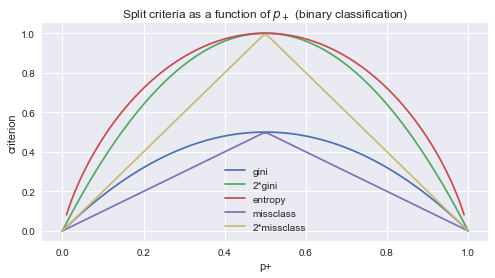

In [2]:
# plotting
plt.rcParams['figure.figsize'] = (8,4)
xx = np.linspace(0, 1, 100) # x-axis grid
# plot graphs
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='missclass')
plt.plot(xx, [2 - 2 * max(x, 1-x) for x in xx], label='2*missclass')
# set axis labels
plt.xlabel('p+')
plt.ylabel('criterion')
# set title and legend
plt.title('Split criteria as a function of $p_+$ (binary classification)')
plt.legend();

<h3 style="font-size:16px; font-family:Verdana">[To the table of contents](#0)</h3>

<a id='3'></a>

<hr style="height: 1px; background-color: #808080">
## 3. Synthetic Example (sklearn)

Consider an example of applying a decision tree from the Scikit-learn package for synthetic data classification. 
<br>Two classes will be generated from two normal distributions with different means:

In [3]:
# first class
np.random.seed(42)
n = 50 # sample size
train_data = np.random.normal(size=(n, 2))
train_labels = np.zeros(n)

# add second class
train_data = np.r_[train_data, np.random.normal(size=(n, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(n)]

Let's display generated data. 
<br>Informally speaking, the problem of classification in this case is to **construct some kind of "good" boundary to separate the two classes** (red dots from yellow). 
<br>Exaggerating, machine learning in this case boils down to choosing a good dividing surface. It is possible that
- the line (hyperplane) would be too simple as a boundary, 
- some complex curve around each red dot will be too complicated and we will make many mistakes on new examples. 

Intuition dictates that a *smooth* boundary separating 2 classes, or at least just a straight line (in the $n$-dimensional space, a hyperplane) will work well/be robust to classify the new data.

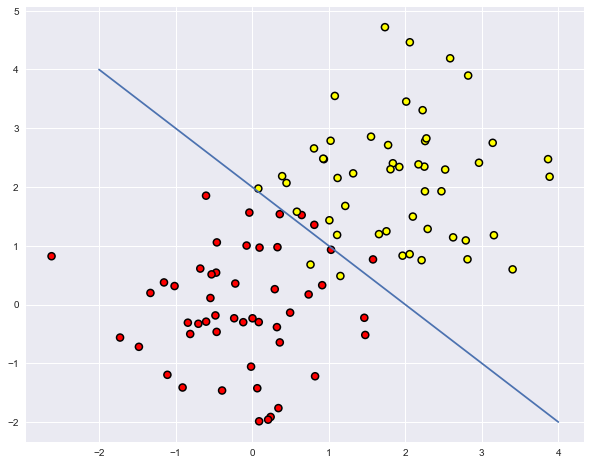

In [4]:
plt.rcParams['figure.figsize'] = (10,8)
# plot 2D points, color == class label
plt.scatter(
    train_data[:, 0], 
    train_data[:, 1], 
    c=train_labels, 
    s=n, 
    cmap='autumn', 
    edgecolors='black', 
    linewidth=1.5
)
plt.plot(range(-2,5), range(4,-3,-1)) # add hyperplane

Let's try to separate these 2 classes by fitting a decision tree on the training data. 
<br>**max_depth** - a hyperparameter for an upper boundary of tree depth would be used (limit = 3)


0.96


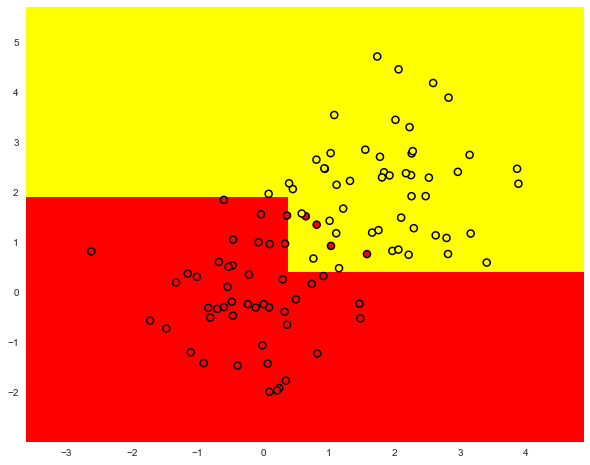

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# helper function, returns grid to be used in further visualization
def __get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# hyperparameter min_samples_leaf points to 
# minimal count of elements in a node to be split further
clf_tree = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=3, 
    random_state=17
)

# helper function, to be used in decision boundary plotting
def plot_decision_boundary(train_data, train_labels, model, point_cnt):
    # get grid
    xx, yy = __get_grid(train_data)
    # get predictions
    predicted = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # plot decision boundary
    plt.pcolormesh(xx, yy, predicted, cmap='autumn') # plot regions of membership
    plt.scatter(
        train_data[:, 0], 
        train_data[:, 1], 
        c=train_labels, 
        s=point_cnt, 
        cmap='autumn', 
        edgecolors='black', 
        linewidth=1.5
    )
    
# fit model (DT)
clf_tree.fit(train_data, train_labels)

# plot boundary
plot_decision_boundary(train_data, train_labels, clf_tree, n)

# check accuracy
print(accuracy_score(train_labels, clf_tree.predict(train_data)))

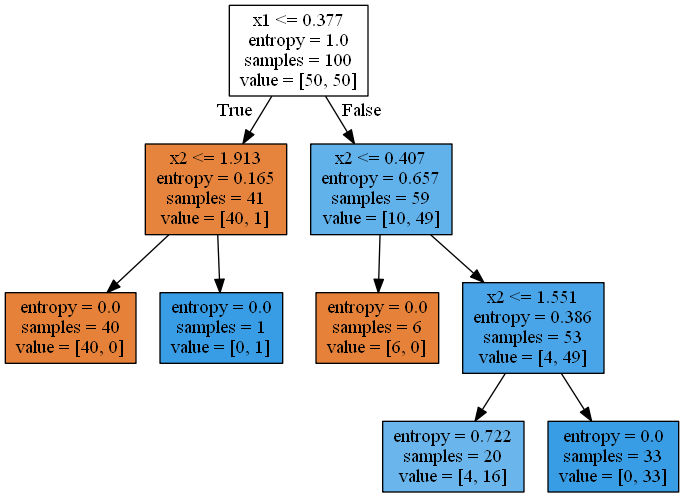

In [6]:
# use .dot format for tree structure visualization
from sklearn.tree import export_graphviz
# don't forget to install GraphViz executables before executing this cell
from IPython.display import Image

export_graphviz(
    clf_tree, 
    feature_names=['x1', 'x2'], 
    out_file='small_tree.dot', 
    filled=True
)

# Windows-only fix
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

!dot.exe -Tpng small_tree.dot -o small_tree.png
# use for macOS / Linux
#!dot -Tpng small_tree.dot -o small_tree.png

# visualize obtained tree structure
Image("small_tree.png", width=550, height=400)

How is this tree "read"?

In the beginning there were 100 objects, 50 of one class and 50 of another. The entropy of the initial state **was equal 1 (maximum)**. 

Then, the objects were divided into 2 groups depending on value of the feature $x_{i}$
<br>In this case, the entropy in both the left and right groups of objects decreased. 
<br>And so on, the tree is built to **depth 3**. 

Within selected rendering, the more objects of the 1st class are, the closer to dark orange the vertex color would be, conversely, the more objects of the 2nd class, the closer the color to the dark blue. 
<br>At the beginning, the counts **are equal**, thus, the root of the tree is white.

<h3 style="font-size:16px; font-family:Verdana">[To the table of contents](#0)</h3>

<a id='4'></a>

<hr style="height: 1px; background-color: #808080">
## 4. Numerical Features Handling


Consider there is a numerical feature "Age" that has many unique values. The decision tree will look for the best (by IG criterion or similar) sample partitioning, checking the binary conditions like **"Age $\lt$ 17"**, **"Age $\lt$ 22.87"**, etc. 
<br>But what if there are too many partitions? What if there is additional numerical feature "Salary", and the salary, too, can be "cut" in many ways? 
<br>There would be too many binary splits to perform for choosing the best tree structure.

To somehow solve this problem, different heuristics are used to limit the number of times we "compare" the numerical feature.

Consider another toy example:

In [7]:
import pandas as pd

data = pd.DataFrame(
    {
        'age': [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33],
        'loan_payed': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
    }
)
data

,age,loan_payed
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [8]:
# let's sort it by age (ascending)
data.sort_values(by='age', ascending=True)

,age,loan_payed
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


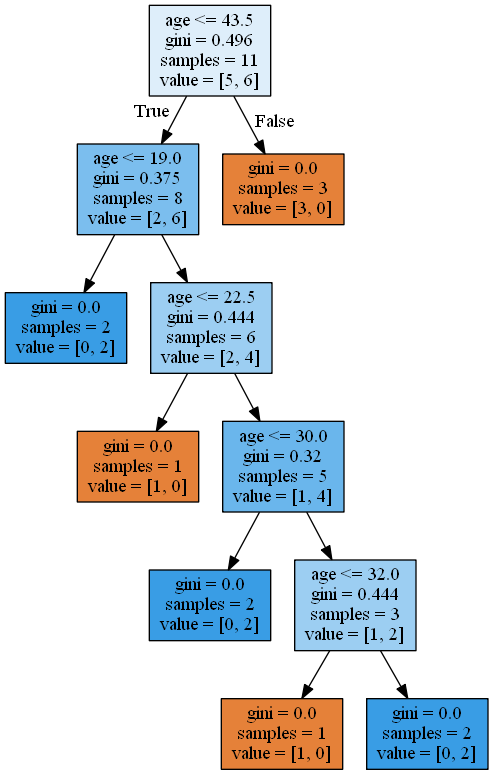

In [9]:
# let's fit a decision tree on this data (don't cut the max_depth param)

age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['age'].values.reshape(-1, 1), data['loan_payed'].values)

export_graphviz(
    age_tree, 
    feature_names=['age'], 
    out_file='age_tree.dot', 
    filled=True
)

!dot.exe -Tpng age_tree.dot -o age_tree.png
# use for macOS / Linux
#!dot -Tpng age_tree.dot -o age_tree.png

# visualize obtained tree structure
Image("age_tree.png", width=400, height=250)

In the picture above, we see that the tree involved 5 values to compare age with: **43.5, 19, 22.5, 30 and 32 years**. If you look closely, then this is the value between the ages at which **the target class "changes" from 1 to 0 or vice versa**.
<br>That might seems complex, however: 43.5 is the average between 38 and 49 years, a client who did not return a loan for 38 years, but the one who was returned to 49. 
<br>Similarly, 19 years is an average between 18 and 20 years. That is, the tree "looks" at those values **at which the target class changes its value** as thresholds for "cutting" the numerical feature,

**Think about why it does not make sense to consider the split "Age $\lt$ 17.5".**

**Consider more complex example (another numerical feature "salary" is added)**

In [10]:
data['salary'] = [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88]
data

,age,loan_payed,salary
0,17,1,25
1,64,0,80
2,18,1,22
3,20,0,36
4,38,1,37
5,49,0,59
6,55,0,74
7,25,1,70
8,29,1,33
9,31,0,102


If we sort it by age, then target class ("loan was payed") changes (from 1 to 0 or vice versa) **5 times**, while sorting by salary leads to **7 changes**
<br>How would the tree choose splits?

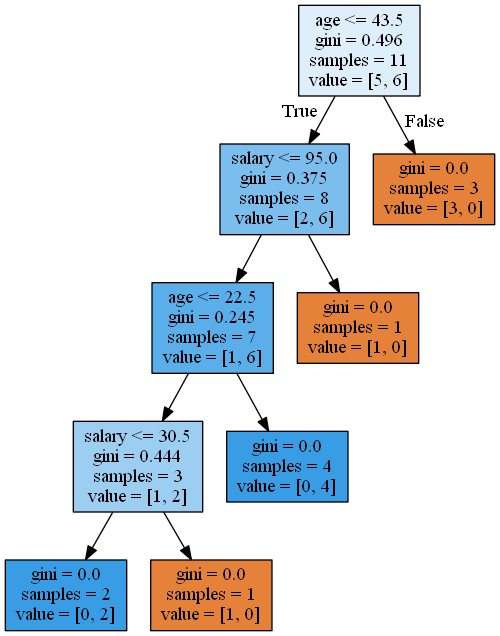

In [11]:
age_sal_tree = DecisionTreeClassifier(random_state=17)
age_sal_tree.fit(data[['age', 'salary']].values, data['loan_payed'].values);

export_graphviz(age_sal_tree, feature_names=['age', 'salary'], 
out_file='age_sal_tree.dot', filled=True)

!dot.exe -Tpng age_sal_tree.dot -o age_sal_tree.png
# use for macOS / Linux
#!dot -Tpng age_sal_tree.dot -o age_sal_tree.png

# visualize obtained tree structure
Image("age_sal_tree.png", width=350, height=250)

We see that in **both age and salary splits** are involved.
<br>Again, "transition points" between class 1 and class 0 were used for both features.
<br>That is, the comparison of salary and age **was not performed for all possible values**, but for a small meaningful subset. 
<br>And why were these EXACT points were chosen? Because these splits turned out to be better (by Gini's uncertainty criterion).

**Conclusion**: The simplest heuristic for processing numerical features in the decision tree: the feature is sorted in ascending order, and only those thresholds for which the target variable changes values are checked by the tree. 
<br>It is not a strict explanation, however it makes sense and serves for better concept understanding.

Additionally, when there are too many numerical features with many unique values present in the data, **only top-N thresholds with maximum increment of criterion might be checked**. 
<br>That is, in fact, **for each threshold a tree of depth 1 is constructed**, it is considered how much the entropy (or Gini's uncertainty) has decreased and only the best thresholds worth comparing with are selected.

More examples of numerical feature discretization can be found in posts similar to [this](http://kevinmeurer.com/a-simple-guide-to-entropy-based-discretization/) or [this](http://clear-lines.com/blog/post/Discretizing-a-continuous-variable-using-Entropy.aspx). 
<br>One of the most famous scientific articles on this topic is "On the handling of continuous-valued attributes in decision tree generation" (U.M. Fayyad, K.B. Irani, "Machine Learning", 1992).

<h3 style="font-size:16px; font-family:Verdana">[To the table of contents](#0)</h3>

<a id='5'></a>

<hr style="height: 1px; background-color: #808080">
## 5. DT Hyperparams

Without loss of generality, a decision tree can be built **to such a depth that each leaf holds  exactly one object**. But in practice (if only one tree is built) you'd better avoid it - such tree lacks genealization power and can't capture real dependencies in the data, thus, **won't be useful for predicting of unseen data**. 
Somewhere below the tree, [**at great depths of a DT**](http://vlasti.net/news/news062010/91336/data/a8b335b83464d9409d60c8c953151610.jpg), splits are being made on less important features which doesn't correlate with the common sense: if to exaggerate, it may turn out that **none of the 3 clients who came to the bank for a loan in green pants returned the loan**. 
<br>Actually, we do not want our classification model to generate such specific rules.

There are two exceptions present (trees are built to the **maximum depth**):

- **A random forest (averaged composition of many DTs)** averages the answers of trees constructed to the maximum depth (why it is worth doing exactly that, we'll figure out later)
- **Tree "cutting" (pruning)**. Within this approach, the tree is first constructed to the maximum depth, then gradually, in bottom-up fashion, some leafs of the tree are removed by comparing the quality of the tree *having this partition* and *not having it* (the comparison is done by using cross-validation, which was described in [**Lecture 3**](https://github.com/udsclub/udscourse/tree/master/lectures)). 
<br>More can be read in [the repository of Yevgeny Sokolov](https://github.com/esokolov/ml-course-hse).

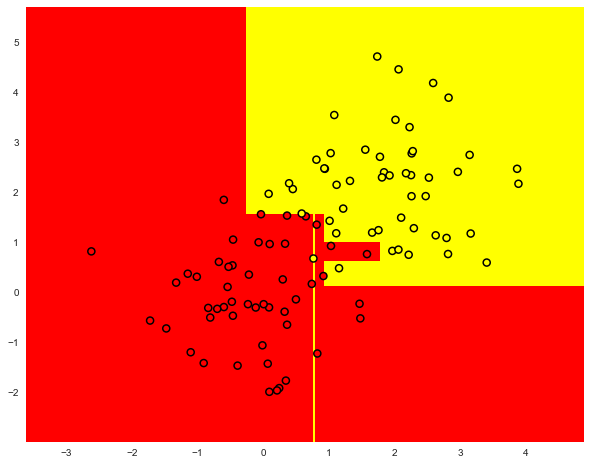

In [12]:
# let's build some overfitted DT :)

# define overfitted tree
of_tree = DecisionTreeClassifier(random_state=17)

# fit model (DT)
of_tree.fit(train_data, train_labels)

# plot boundary
plot_decision_boundary(train_data, train_labels, of_tree, n)

In [13]:
# As we can see, tree's train accuracy is 100% but such models are 
# 99% useless for future predictions or at least performs WORSE than tuned models
print(accuracy_score(train_labels, of_tree.predict(train_data)))

1.0


Main sources of DT regularizations (dealing with overfitting, reduce error on **test data**):
- Artificial constraints on max_depth or min_objects_in_leaf params - tree would have less "overfitted" leafs
- Tree pruning


### Class DecisionTreeClassifier in Scikit-learn

Main hyperparams of [sklearn.tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html):

- *max_depth* – obviously, max depth of the decision tree
- *max_features* — max amount of features (columns in X matrix), which are used as a candidate for best splits search (that's used often, otherwise best split search within all the features might become "expensive" <br>(regarding some criterion like Giny or IG) 
- *min_samples_leaf* – the minimum number of objects in the leaf. This parameter has a meaningful interpretation: for example, if it is **equal to 7**, then the tree will generate only those classifying rules that are true for **at least 7 objects**

This hyperparams are tuned using **cross-validation strategies**

 

<h3 style="font-size:16px; font-family:Verdana">[To the table of contents](#0)</h3>

<a id='6'></a>

<hr style="height: 1px; background-color: #808080">
### 6. DT in Regression Tasks


When the target variable is continuous the construction of DT remains the same, the only change is the quality criteria - now it's variance:

$\Large D = \frac{1}{\ell} \sum\limits_{i =1}^{\ell} (y_i - \frac{1}{\ell} \sum\limits_{i =1}^{\ell} y_i)^2,$

where $l$ is the number of elements in leaf, $y_i$ is the target value

Simply put, minimization of variance allow us to find features that splits our sample in a way that **target values within each leaf are approximately equal**

Synthetic example:

Lets generate some data from $y(x) = sin(x)*x^2$ distribution, add some random noise and see that the decision tree **approximates the dependence in the data by a piecewise-constant function**.

Text(0.5,1,'Decision tree regressor, MSE = 958.73')

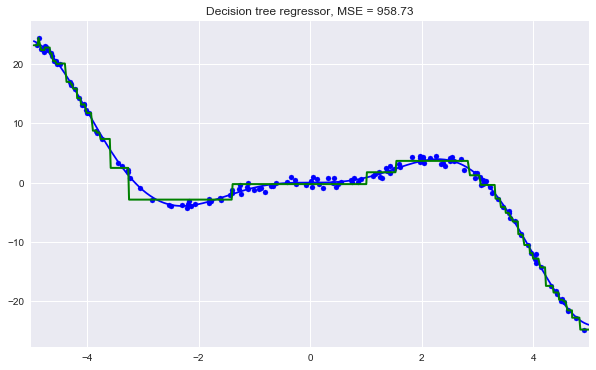

In [14]:
from sklearn.tree import DecisionTreeRegressor


n_train = 150
n_test = 1000
noise = 0.5


def f(x):
    x = x.ravel()
    return np.sin(x) * x**2


def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.sin(X) * X**2 + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y


X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)


reg_tree = DecisionTreeRegressor(max_depth=6, random_state=42)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=25)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" %
          np.sum((y_test - reg_tree_pred) ** 2))

<h3 style="font-size:16px; font-family:Verdana">[To the table of contents](#0)</h3>

<a id='7'></a>

<hr style="height: 1px; background-color: #808080">
### 7. DT: Strengths and Weaknesses

Pros and cons of decision trees

**Strengths:**

- The emergence of clear classification rules, understandable to a person, for example, "if the age is $\lt 25$ and interested in motorcycles, then refuse credit." <br>This property is called the interpretability of the model;
- Decision trees can be easily visualized, that is, they can be "interpreted" (both the model (tree) and the forecast for the individual test object (the path in the tree);
- Fast train / prediction;
- A small number of model hyperparameters;
- Support for both numeric and categorical attributes;
- Numerical features doesn't need to be standard scaled (in contrary to, say, linear models or neural networks)
- Can handle missing data (somehow)


**Weaknesses:**

- The generation of clear classification rules has its drawbacks: the trees **are very sensitive to noise in the input data**, the whole model can drastically change if the training sample changes slightly (for example, if one of the features is removed or several objects are added), so the classification rules can be slightly changed, which worsens the interpretability of the model;
- The separating decision boundary constructed by the decision tree has its limitations **(it consists of hyperplanes perpendicular to one of the coordinate axes)**, and in practice the decision tree for the quality of classification is inferior to some other methods;
- **Instability**. Small changes in the data can significantly change the decision tree. To deal with it, ensembles of decision trees are used (see lectures 5-6);
- The problem of finding the optimal decision tree (minimal in size and capable of classifying the sample without errors) is **NP-complete**, so in practice heuristics are used, such as greedy search, that **does not guarantee a globally optimal** tree;
- Missing data are difficult to maintain. Friedman estimated that about 50% of the CART code was used to support the missing values in the data (the classical algorithm for constructing classification and regression trees - Classification And Regression Trees; sklearn implemented an improved version of this algorithm);
- The model can only interpolate, but **not extrapolate** (the same is still a problem for the random forest and the gradient boosting ensembles). <br>That is, the decision tree makes a **constant prediction** for objects located in the attribute space **outside the parallelepiped, which encompasses all objects of the training sample**. In our [toy example](#2) with yellow and blue balls, this means that the model gives the same prediction for all balls outside of a coordinate range [0,19].

<h3 style="font-size:16px; font-family:Verdana">[To the table of contents](#0)</h3>

<a id='8'></a>

<hr style="height: 1px; background-color: #808080">
### 8. DT in Real-Words Problems (Toxic Comment Classification)

Let's predict "toxicity" of a text, using train set from 
<br>**Kaggle Toxic Comment Classification Challenge** <br>(in the same fashion we did it in Lecture 2 with linear models)

Data can be found [here](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data)


In [15]:
import eli5
from os.path import join as pjoin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score

# read data
DATA_DIR = 'data'
train = pd.read_csv(pjoin(DATA_DIR, 'toxic-train.csv'), engine='c')
# see sample
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [16]:
# get bag-of-words
word_vectorizer = CountVectorizer(
    max_df=0.85,
    min_df=3,
    max_features=10000,
    stop_words='english'
)
train_word_features = word_vectorizer.fit_transform(train['comment_text'])

# define validation + target
test_size = 1000
target = 'toxic'

x_train = train_word_features[:-test_size]
x_test = train_word_features[-test_size:]
y_train = train[target][:-test_size]
y_test = train[target][-test_size:]

# check shapes
x_train.shape, x_test.shape

((158571, 10000), (1000, 10000))

In [17]:
# check the label balance is preserved in train/validation
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.904056
1    0.095944
Name: toxic, dtype: float64
0    0.92
1    0.08
Name: toxic, dtype: float64


In [18]:
# define decision tree and fit it on data
dt = DecisionTreeClassifier(
    max_depth=25,
    min_samples_leaf=5,
    min_samples_split=7,
    random_state=42,
    max_features=None
)

dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [19]:
# check the results (ROC_AUC) on validation vs train
preds_train = dt.predict(x_train)
preds_test = dt.predict(x_test)

print('ROC-AUC, train: {:.4f}\nROC-AUC, valid: {:.4f}'.format(
    roc_auc_score(y_train, preds_train),
    roc_auc_score(y_test, preds_test)
))

ROC-AUC, train: 0.7770
ROC-AUC, valid: 0.7774


#### Analysis

In [20]:
test_text = """
    hi, ass, why are you delate my talking, just come out say 
"""

print(dt.predict(word_vectorizer.transform([test_text]))) # exact label
print(dt.predict_proba(word_vectorizer.transform([test_text]))) # probabilities

[1]
[[0.05555556 0.94444444]]


In [21]:
# look at individual feature (word) weights
eli5.explain_weights(dt, feature_names=word_vectorizer.get_feature_names())

Weight,Feature
0.2825,fuck
0.1330,fucking
0.0678,shit
0.0533,suck
0.0460,ass
0.0401,stupid
0.0322,idiot
0.0276,bitch
0.0237,asshole
0.0204,faggot


In [22]:
# explain prediction for this specific test comment
eli5.explain_prediction(
    dt, # estimator
    test_text, # data to run prediction for
    # provide a vectorizer used to generate features, 
    # so ELI5 will be able to extract feature names on the fly
    vec=word_vectorizer, 
    #feature_names=word_vectorizer.get_feature_names()
)

Explanation(estimator="DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=25,\n            max_features=None, max_leaf_nodes=None,\n            min_impurity_decrease=0.0, min_impurity_split=None,\n            min_samples_leaf=5, min_samples_split=7,\n            min_weight_fraction_leaf=0.0, presort=False, random_state=42,\n            splitter='best')", description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does show how increasing or decreasing\n   the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='ass', weight=0.696125466031483, std=None, value=1.0), FeatureWeight(feature='<BIAS>', weight=0.09594440345334267, std=None, value=1.0), FeatureWeight(feature='way', weight=0.08368794326241136, std=None, value=0.0), FeatureWeight(feature='person', weight=0.06155015197568392, std=None, value=0.0), FeatureWeight(feature='edit', weight=0.061001712328767166, std=None, value=0.0), FeatureWeight(feature='new', weight=0.046875, std=None, value=0.0), FeatureWeight(feature='point', weight=0.04560430032946072, std=None, value=0.0), FeatureWeight(feature='having', weight=0.04294755877034351, std=None, value=0.0), FeatureWeight(feature='like', weight=0.042483660130718914, std=None, value=0.0), FeatureWeight(feature='wikipedia', weight=0.026960784313725505, std=None, value=0.0), FeatureWeight(feature='talk', weight=0.023297491039426577, std=None, value=0.0)], neg=[FeatureWeight(feature='just', weight=-0.23072916666666665, std=None, value=1.0), FeatureWeight(feature='fuck', weight=-0.014113808490748198, std=None, value=0.0), FeatureWeight(feature='think', weight=-0.012077294685990392, std=None, value=0.0), FeatureWeight(feature='people', weight=-0.011220196353436185, std=None, value=0.0), FeatureWeight(feature='fucking', weight=-0.006762427535640228, std=None, value=0.0), FeatureWeight(feature='shit', weight=-0.004233452761431639, std=None, value=0.0), FeatureWeight(feature='suck', weight=-0.0028976806970056196, std=None, value=0.0)], pos_remaining=0, neg_remaining=0), proba=0.9444444444444444, score=None, weighted_spans=WeightedSpans(docs_weighted_spans=[DocWeightedSpans(document='\n    hi, ass, why are you delate my talking, just come out say \n', spans=[('ass', [(9, 12)], 0.696125466031483), ('just', [(45, 49)], -0.23072916666666665)], preserve_density=False, vec_name=None)], other=FeatureWeights(pos=[FeatureWeight(feature=<FormattedFeatureName 'Highlighted in text (sum)'>, weight=0.4653962993648163, std=None, value=None), FeatureWeight(feature='<BIAS>', weight=0.09594440345334267, std=None, value=1.0), FeatureWeight(feature='way', weight=0.08368794326241136, std=None, value=0.0), FeatureWeight(feature='person', weight=0.06155015197568392, std=None, value=0.0), FeatureWeight(feature='edit', weight=0.061001712328767166, std=None, value=0.0), FeatureWeight(feature='new', weight=0.046875, std=None, value=0.0), FeatureWeight(featu

<h3 style="font-size:16px; font-family:Verdana">[To the table of contents](#0)</h3>